In [1]:
from pyrep import PyRep
import numpy as np
from matplotlib import pyplot as plt
from pyrep.objects.shape import Shape
from pyrep.const import PrimitiveShape
from pyrep.objects.vision_sensor import VisionSensor
from IPython import display

In [2]:
f = open("soma_cube.txt", "r")
text = f.read()

In [3]:
split_sols = text.split('solution')
solutions = [split_sols[j] for j in range(1,241)]

In [4]:
action_list = []
pic_list = []
for s in solutions:

    actions = s.split('\n')[1:8]
    action_list.append(actions)
    
    pic = s.split('\n')[9:12]
    pic_list.append(pic)

In [5]:
pr = PyRep()
pr.launch(headless=False)

In [6]:
pr.start()

In [7]:
from matplotlib import cm
cols = cm.get_cmap('tab20c', 7)

In [8]:
blocks = ['T','p','V','L','Z','b','a']

In [9]:
idx = 0

In [10]:
for i,a in enumerate(action_list[idx]):
    col_idx = blocks.index(a[-1])
    color = (cols.colors[col_idx][0:3]).tolist()

    pose = np.array(' '.join(a[0:-1].split(',')).split()).reshape(-1,3).astype(int)*0.05 + [0.05,0.05,0.05]
    for p in pose:
        obj = Shape.create(type=PrimitiveShape.CUBOID, 
                      color=color, size=[0.05, 0.05, 0.05],
                      position=p.tolist())
        obj.set_color(color)
        #pr.step()
pr.step()

In [11]:
cam0 = VisionSensor.create([64,64],position=[0.1,0.1,0.5],orientation=[np.pi,0,0])
cam1 = VisionSensor.create([64,64],position=[0.5,0.1,0.1],orientation=[0,-np.pi/2,0])
cam2 = VisionSensor.create([64,64],position=[0.1,0.5,0.1],orientation=[np.pi/2,0,0])
cam3 = VisionSensor.create([64,64],position=[0.1,-0.5,0.1],orientation=[-np.pi/2,0,0])

In [12]:
for j in range(100):
    pr.step()

In [13]:
pr.stop()

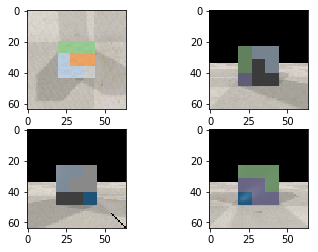

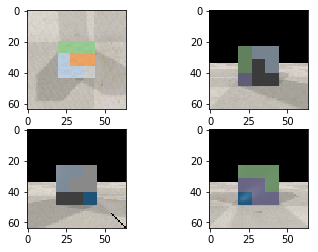

In [14]:
cubes = []
for idx in range(len(action_list)):
    print('\r%d'%idx,end='')
    pr.start()
        
    cam0 = VisionSensor.create([64,64],position=[0.1,0.1,0.5],orientation=[np.pi,0,0])
    cam1 = VisionSensor.create([64,64],position=[0.5,0.1,0.1],orientation=[0,-np.pi/2,-np.pi/2])
    cam2 = VisionSensor.create([64,64],position=[0.1,0.5,0.1],orientation=[np.pi/2,0,0])
    cam3 = VisionSensor.create([64,64],position=[0.1,-0.3,0.1],orientation=[-np.pi/2,0,-np.pi])
    
    # Make cube for 
    for i,a in enumerate(action_list[idx]):
        col_idx = blocks.index(a[-1])
        color = (cols.colors[col_idx][0:3]).tolist()

        pose = np.array(' '.join(a[0:-1].split(',')).split()).reshape(-1,3).astype(int)*0.05 + 0.05
        for p in pose:
            obj = Shape.create(type=PrimitiveShape.CUBOID, 
                          color=color, size=[0.05, 0.05, 0.05],
                          position=p.tolist())
            obj.set_color(color)
            #pr.step()
    for j in range(10):
        pr.step()
    im0 = cam0.capture_rgb()
    im1 = cam1.capture_rgb()
    im2 = cam2.capture_rgb()
    im3 = cam3.capture_rgb()
    
    pr.step()
    
    cubes.append((im0,im1,im2,im3))
    
    plt.cla()
    plt.subplot(2,2,1)
    plt.imshow(cubes[-1][0])
    plt.subplot(2,2,2)
    plt.imshow(cubes[-1][1])
    plt.subplot(2,2,3)
    plt.imshow(cubes[-1][2])
    plt.subplot(2,2,4)
    plt.imshow(cubes[-1][3])
       
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    pr.stop()

In [15]:
pr.stop()
#pr.shutdown()

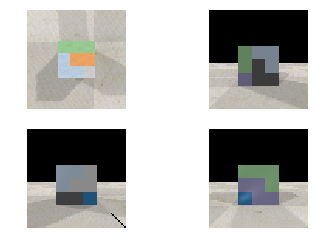

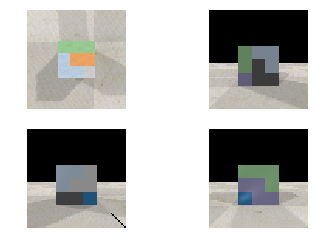

In [18]:
for i,c in enumerate(cubes):
    plt.clf()
    plt.subplot(2,2,1)
    plt.imshow(c[0])
    plt.axis('off')
    plt.subplot(2,2,2)
    plt.imshow(c[1])
    plt.axis('off')
    plt.subplot(2,2,3)
    plt.imshow(c[2])
    plt.axis('off')
    plt.subplot(2,2,4)
    plt.imshow(c[3])
    plt.axis('off')
    plt.savefig('/tmp/im_%03d.jpg'%i)
       
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [16]:
np.save('cube_ims.npy',cubes)

In [17]:
pr.shutdown()